In [1]:
# Step 1: Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Step 2: Load Dataset
data = pd.read_csv("adult_with_headers (1).csv")
print("Shape of data:", data.shape)
data.head()


Shape of data: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Summary Statistics:



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


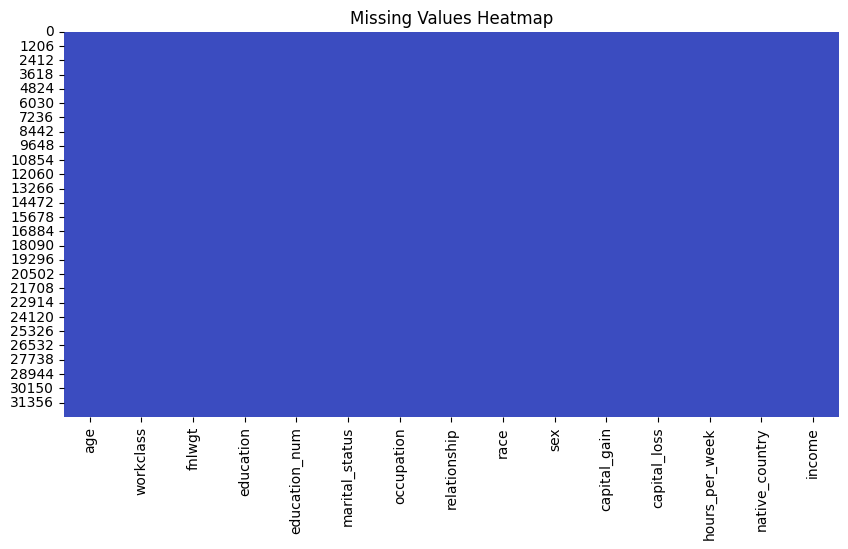

In [11]:
# Step 3: Basic Data Exploration
print("Data Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:\n")
display(data.describe(include='all'))

# Visualize missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()


In [3]:
# Step 4: Handle Missing Values
# Replace '?' or similar markers with NaN
data.replace("?", np.nan, inplace=True)

# Fill missing categorical values with mode, numerical with median
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

print("Missing values after imputation:\n", data.isnull().sum().sum())


Missing values after imputation:
 0


/tmp/ipython-input-3172606977.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipython-input-3172606977.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [4]:
# Step 5: Identify numerical and categorical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numerical Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']



--- Standard Scaled ---
         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  

--- Min-Max Scaled ---
         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_pe

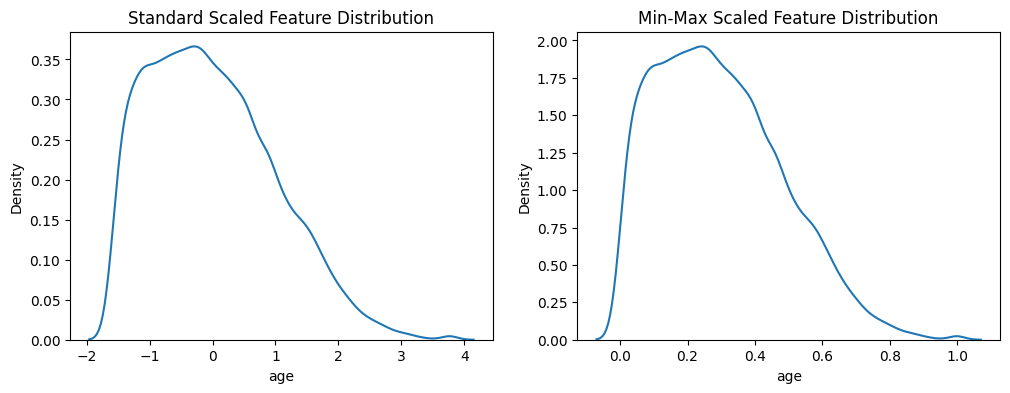

In [5]:
# Step 6: Scaling (Standard and Min-Max)
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

scaled_standard = pd.DataFrame(scaler_standard.fit_transform(data[num_cols]), columns=num_cols)
scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(data[num_cols]), columns=num_cols)

# Compare scaling results for first few rows
print("\n--- Standard Scaled ---\n", scaled_standard.head())
print("\n--- Min-Max Scaled ---\n", scaled_minmax.head())

# Visualization of scaling difference
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.kdeplot(scaled_standard[num_cols[0]], ax=axes[0])
axes[0].set_title("Standard Scaled Feature Distribution")
sns.kdeplot(scaled_minmax[num_cols[0]], ax=axes[1])
axes[1].set_title("Min-Max Scaled Feature Distribution")
plt.show()


In [6]:
# Step 7: Encoding Categorical Features
one_hot_cols = [col for col in cat_cols if data[col].nunique() <= 5]
label_cols = [col for col in cat_cols if data[col].nunique() > 5]

# One-Hot Encoding
data_onehot = pd.get_dummies(data[one_hot_cols], drop_first=True)

# Label Encoding
data_label = data[label_cols].apply(LabelEncoder().fit_transform)

# Combine all encoded columns with numerical data
data_encoded = pd.concat([data[num_cols], data_onehot, data_label], axis=1)
print("Shape after encoding:", data_encoded.shape)
data_encoded.head()


Shape after encoding: (32561, 18)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country
0,39,77516,13,2174,0,40,False,False,False,True,True,False,7,9,4,1,1,39
1,50,83311,13,0,0,13,False,False,False,True,True,False,6,9,2,4,0,39
2,38,215646,9,0,0,40,False,False,False,True,True,False,4,11,0,6,1,39
3,53,234721,7,0,0,40,False,True,False,False,True,False,4,1,2,6,0,39
4,28,338409,13,0,0,40,False,True,False,False,False,False,4,9,2,10,5,5


In [7]:
# Step 8: Feature Engineering
# Example 1: Combine 'education' and 'hours-per-week' into a ratio
if 'education-num' in data.columns and 'hours-per-week' in data.columns:
    data_encoded['edu_hour_ratio'] = data['education-num'] / (data['hours-per-week'] + 1)

# Example 2: Age Group Feature
if 'age' in data.columns:
    data_encoded['age_group'] = pd.cut(data['age'],
                                       bins=[0, 25, 45, 65, 100],
                                       labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Example 3: Log transformation (skewed feature)
if 'capital-gain' in data.columns:
    data_encoded['capital-gain-log'] = np.log1p(data['capital-gain'])

data_encoded.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country,age_group
0,39,77516,13,2174,0,40,False,False,False,True,True,False,7,9,4,1,1,39,Adult
1,50,83311,13,0,0,13,False,False,False,True,True,False,6,9,2,4,0,39,Middle-aged
2,38,215646,9,0,0,40,False,False,False,True,True,False,4,11,0,6,1,39,Adult
3,53,234721,7,0,0,40,False,True,False,False,True,False,4,1,2,6,0,39,Middle-aged
4,28,338409,13,0,0,40,False,True,False,False,False,False,4,9,2,10,5,5,Adult


In [8]:
# Step 9: Check distribution after transformation
if 'capital-gain-log' in data_encoded.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data['capital-gain'], bins=30, ax=ax[0], kde=True)
    ax[0].set_title("Original Capital Gain")
    sns.histplot(data_encoded['capital-gain-log'], bins=30, ax=ax[1], kde=True)
    ax[1].set_title("Log-Transformed Capital Gain")
    plt.show()


In [9]:
# Step 10: Final Clean Dataset
print("Final dataset shape:", data_encoded.shape)
print("\nSample of processed data:")
data_encoded.head()


Final dataset shape: (32561, 19)

Sample of processed data:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,native_country,age_group
0,39,77516,13,2174,0,40,False,False,False,True,True,False,7,9,4,1,1,39,Adult
1,50,83311,13,0,0,13,False,False,False,True,True,False,6,9,2,4,0,39,Middle-aged
2,38,215646,9,0,0,40,False,False,False,True,True,False,4,11,0,6,1,39,Adult
3,53,234721,7,0,0,40,False,True,False,False,True,False,4,1,2,6,0,39,Middle-aged
4,28,338409,13,0,0,40,False,True,False,False,False,False,4,9,2,10,5,5,Adult
